In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Function to initialize K centroids randomly from the dataset
def initialize_centroids(X, K):
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

# Function to assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Function to compute new centroids based on current cluster assignments
def compute_centroids(X, labels, K):
    return np.array([X[labels == k].mean(axis=0) for k in range(K)])


In [ ]:
# K-Means algorithm
def kmeans(X, K, max_iters=100, tol=1e-4):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        # Step 2: Assign clusters
        labels = assign_clusters(X, centroids)
        # Step 3: Recompute centroids
        new_centroids = compute_centroids(X, labels, K)
        # Check for convergence (if centroids do not change significantly)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

In [ ]:
# Load the dataset from your local file path
file_path = r'C:\Users\DT USER\Downloads\student_clustering.csv'
data = pd.read_csv(file_path)

In [ ]:
# Prepare the data for clustering
X = data[['cgpa', 'iq']].values
# Set the number of clusters (K)
K = 3
# Run the K-Means algorithm
centroids, labels = kmeans(X, K)

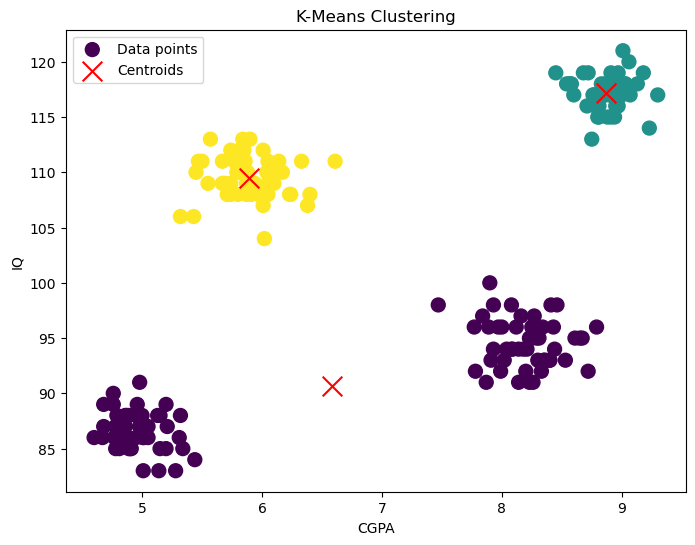

In [ ]:
# Plot the clusters
def plot_clusters(X, labels, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=100, label='Data points')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
    plt.xlabel('CGPA')
    plt.ylabel('IQ')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()
# Visualize the clusters
plot_clusters(X, labels, centroids)

# CONCLUSION:


The K-Means clustering algorithm successfully grouped the students into distinct clusters based on their CGPA and IQ values.
The centroids of each cluster represent the average characteristics of the students in that group, helping to identify patterns or similarities within the data.